In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import morton

In [8]:
#df = pd.read_csv ('./thesis_data/data/SteeringWheelAngle-10Hz.csv', sep=';', usecols = ['sampleTimeStamp.seconds','sampleTimeStamp.microseconds','lat', 'lon', 'speed', 'accel_lon', 'accel_trans', 'accel_down'])
#df.rename(columns = {'timestamp:10881:<lon>':'ts', 'accel_lon:10881:<double>':'accel_lon', 'accel_trans:10881:<double>':'accel_trans', 'accel_down:10881:<double>':'accel_down'}, inplace = True)
df = pd.read_csv ('./thesis_data/data/SteeringWheelAngle-10Hz.csv', sep=';', usecols = ['sampleTimeStamp.seconds','sampleTimeStamp.microseconds','SteeringWhlAngle'])
df['ts'] = (df['sampleTimeStamp.seconds']*1000000)+df['sampleTimeStamp.microseconds']
df = df.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

In [9]:
# Not sure what this is!!!

#faktor_multiply = 1000000; offset = 10

#df['lon'] = df.apply(lambda x: int(x['lon']*faktor_multiply) , axis=1)
#df['lat'] = df.apply(lambda x: int(x['lat']*faktor_multiply) , axis=1)

#offset = 10

# df['accel_lon'] = df['accel_lon'].add(offset)
# df['accel_trans'] = df['accel_trans'].add(offset)
# df['accel_down'] = df['accel_down'].add(offset)

# faktor_multiply = 10000

# df['accel_lon'] = df.apply(lambda x: int(x['accel_lon']*faktor_multiply) , axis=1)
# df['accel_trans'] = df.apply(lambda x: int(x['accel_trans']*faktor_multiply) , axis=1)
# df['accel_down'] = df.apply(lambda x: int(x['accel_down']*faktor_multiply) , axis=1)

In [7]:
m = morton.Morton(dimensions=1, bits=18)

def set_value(row):    
    return m.pack(int(row['accel_lon']), int(row['accel_trans']))


df['morton'] = df.apply(set_value, axis=1)

In [8]:
ts = 1646666599000000
off = 204
ts = ts + (off*1000000)
dff = df[(df['ts'] > ts) & (df['ts'] < ts+4500000)] #10000000
# dff = df[(df['ts'] > 1646666563800000) & (df['ts'] < 1646666564800000)]

#dff = df[(df['accel_lon'] > 140000)]
#dff = df[(df['morton'] > 26776019010)]
#dff

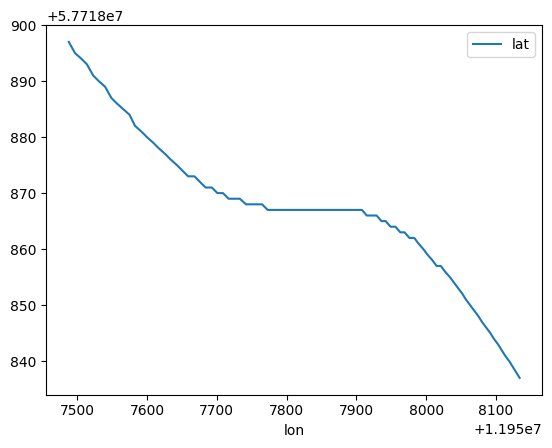

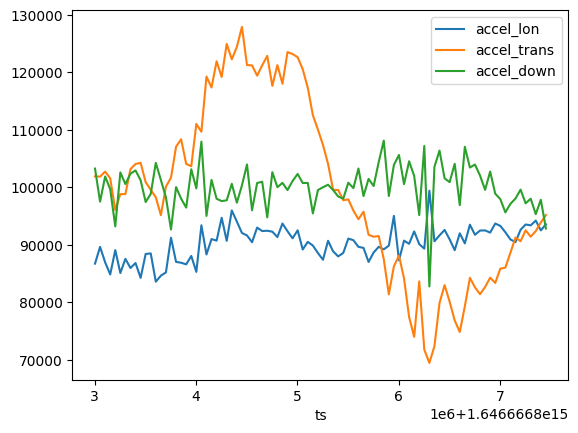

Diagramm incomming...


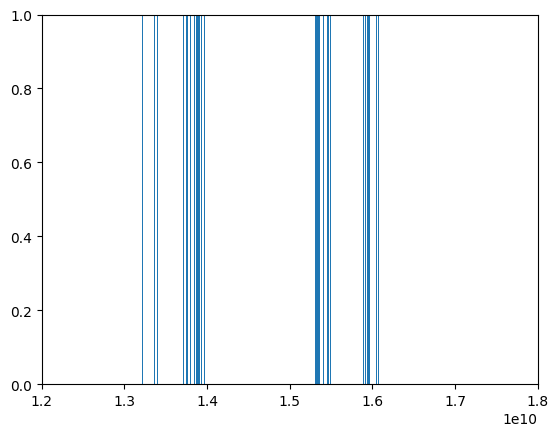

In [9]:
dff.plot(x = 'lon', y = 'lat')
plt.show()
dff.plot(x = 'ts', y=['accel_lon', 'accel_trans', 'accel_down'] )
plt.show()

min = dff['morton'].min()
max = dff['morton'].max()
min = 12000000000
#min= 0
max = 18000000000
#max= 30000000000

print("Diagramm incomming...")

plt.hist(dff['morton'], bins=400)
plt.xlim(min,max)
plt.ylim(0,1)
plt.show()